# Importación de la base

In [2]:
#Paquetes a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Conectar con Google Drive:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Base de datos:

data=pd.read_excel('/content/drive/My Drive/UIFCE/Actividades 2020-1/Base de datos asistencias docentes/Base de datos definitiva.xlsx')
data

,Id_Asistencia,Materia,Software,Profesor Encargado,Programa Curricular,Nivel académico,Fecha,Día de la semana,Horario,Número de participantes,Semestre,Semana del semestre
0,AD20170101,Fundamentos de Finanzas,Excel,Luis German Ome,Administración de Empresas,Pregrado,2017-02-06,lunes,18:00 - 20:00,NaN,2017-01,2
1,AD20170102,Estrategia de Mercados,Moodle,Alvaro Viña,Administración de Empresas,Pregrado,2017-02-08,miércoles,10:00 - 11:00,NaN,2017-01,2
2,AD20170103,Maestría en Administración,Moodle,Luis Alejandro Rodríguez,Maestría en Administración,Posgrado,2017-02-10,viernes,09:00 - 10:00,NaN,2017-01,2
3,AD20170104,Fundamentos de Finanzas,Excel,Luis German Ome,Administración de Empresas,Pregrado,2017-02-13,lunes,18:00 - 20:00,NaN,2017-01,3
4,AD20170105,Teoría Contemporanea de la Organización,Moodle,Alex Árias,Administración de Empresas,Pregrado,2017-02-13,lunes,10:00 - 11:00,NaN,2017-01,3
...,...,...,...,...,...,...,...,...,...,...,...,...
302,AD20190242,Seminario de Investigación I y II,Latex,Karoll Gomez Portilla,Economía,Posgrado,2019-11-19,martes,11:00 - 13:00,5.0,2019-02,13
303,AD20190243,"Diseño, gestión y evaluación de proyectos",Microsoft Project,Natali Barrera,Administración de Empresas,Pregrado,2019-11-19,martes,16:00 - 18:00,30.0,2019-02,13
304,AD20190244,"Diseño, gestión y evaluación de proyectos",Microsoft Project,Natali Barrera,Administración de Empresas,Pregrado,2019-11-21,jueves,16:00 - 18:00,30.0,2019-02,13
305,AD20190245,"Decisiones, comportamiento y neuroeconomía",Z-tree,Mario Garcia Molina,Economía,Posgrado,2019-12-03,martes,18:00 - 20:00,10.0,2019-02,15


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Id_Asistencia            307 non-null    object        
 1   Materia                  303 non-null    object        
 2   Software                 307 non-null    object        
 3   Profesor Encargado       307 non-null    object        
 4   Programa Curricular      305 non-null    object        
 5   Nivel académico          307 non-null    object        
 6   Fecha                    307 non-null    datetime64[ns]
 7   Día de la semana         307 non-null    object        
 8   Horario                  265 non-null    object        
 9   Número de participantes  209 non-null    float64       
 10  Semestre                 307 non-null    object        
 11  Semana del semestre      307 non-null    int64         
dtypes: datetime64[ns](1), float64(1), in

# 1. Modelo de MCO

In [6]:
numero_asistencias = data.groupby("Fecha").count()[["Id_Asistencia"]]

In [7]:
numero_asistencias.rename(columns = {"Id_Asistencia": "Número de asistencias"}, inplace = True)

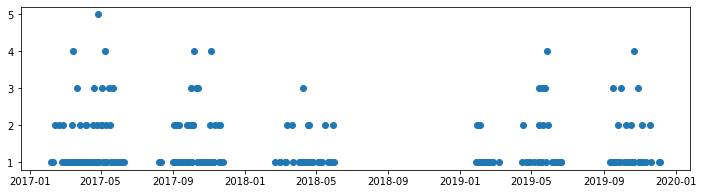

In [8]:
fig, ax = plt.subplots(figsize = (12,3))
ax.scatter(numero_asistencias.index, numero_asistencias["Número de asistencias"])

In [9]:
info_explicativas = data[["Día de la semana", "Semestre", "Semana del semestre", "Fecha"]].set_index("Fecha")

In [10]:
dataset_modelo = pd.concat([numero_asistencias, info_explicativas], axis = 1)

In [11]:
dataset_modelo.head()

,Número de asistencias,Día de la semana,Semestre,Semana del semestre
Fecha,,,,
2017-02-06,1,lunes,2017-01,2
2017-02-08,1,miércoles,2017-01,2
2017-02-10,1,viernes,2017-01,2
2017-02-13,2,lunes,2017-01,3
2017-02-13,2,lunes,2017-01,3


In [12]:
dataset_modelo.drop_duplicates(inplace = True)

In [13]:
dataset_modelo["Semestre"].unique()

array(['2017-01', '2017-02', '2018-01', '2018-02', '2019-01', '2019-02'],
      dtype=object)

In [14]:
# Mapear semestre:
dataset_modelo["Semestre"] = dataset_modelo["Semestre"].map({"2017-01": 1, 
                                                             "2017-02": 2, 
                                                             "2018-01": 3, 
                                                             "2018-02": 4, 
                                                             "2019-01": 5, 
                                                             "2019-02": 6})

In [15]:
# Convertir semana del semestre a categórica: 
dataset_modelo["Semana del semestre"] = dataset_modelo["Semana del semestre"].astype(str)

In [16]:
dataset_modelo = pd.get_dummies(dataset_modelo)

In [17]:
Dependiente = dataset_modelo["Número de asistencias"]

In [18]:
Explicativas = dataset_modelo.loc[:, "Semestre":].drop(columns = ["Día de la semana_lunes", "Semana del semestre_2"])

In [19]:
Modelo = sm.OLS(Dependiente, sm.add_constant(Explicativas))
Resultados = Modelo.fit()
print(Resultados.summary())

                              OLS Regression Results                             
Dep. Variable:     Número de asistencias   R-squared:                       0.096
Model:                               OLS   Adj. R-squared:                 -0.015
Method:                    Least Squares   F-statistic:                    0.8640
Date:                   Wed, 08 Jul 2020   Prob (F-statistic):              0.646
Time:                           21:59:23   Log-Likelihood:                -240.29
No. Observations:                    212   AIC:                             528.6
Df Residuals:                        188   BIC:                             609.1
Df Model:                             23                                         
Covariance Type:               nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

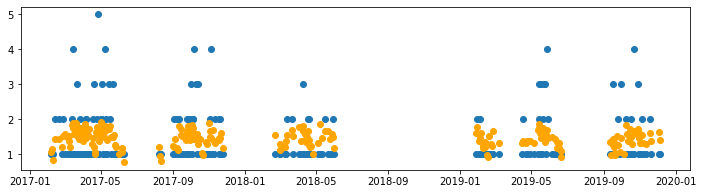

In [20]:
fig, ax = plt.subplots(figsize = (12,3))
ax.scatter(numero_asistencias.index, numero_asistencias["Número de asistencias"])
ax.scatter(Explicativas.index, Resultados.predict(), color = 'orange')

In [21]:
Explicativas = Explicativas[['Día de la semana_jueves', 'Día de la semana_martes',
                            'Día de la semana_miércoles', 'Día de la semana_sábado',
                            'Día de la semana_viernes', 'Semana del semestre_10',
                            'Semana del semestre_11', 'Semana del semestre_12',
                            'Semana del semestre_13', 'Semana del semestre_14',
                            'Semana del semestre_15', 'Semana del semestre_16',
                            'Semana del semestre_17', 'Semana del semestre_18',
                            'Semana del semestre_19', 'Semana del semestre_3',
                            'Semana del semestre_4', 'Semana del semestre_5',
                            'Semana del semestre_6', 'Semana del semestre_7',
                            'Semana del semestre_8', 'Semana del semestre_9']]

In [22]:
Explicativas.columns

Index(['Día de la semana_jueves', 'Día de la semana_martes',
       'Día de la semana_miércoles', 'Día de la semana_sábado',
       'Día de la semana_viernes', 'Semana del semestre_10',
       'Semana del semestre_11', 'Semana del semestre_12',
       'Semana del semestre_13', 'Semana del semestre_14',
       'Semana del semestre_15', 'Semana del semestre_16',
       'Semana del semestre_17', 'Semana del semestre_18',
       'Semana del semestre_19', 'Semana del semestre_3',
       'Semana del semestre_4', 'Semana del semestre_5',
       'Semana del semestre_6', 'Semana del semestre_7',
       'Semana del semestre_8', 'Semana del semestre_9'],
      dtype='object')

# 2. Regresión Poisson:

In [23]:
from patsy import dmatrices

In [24]:
data_poisson = numero_asistencias
ds = numero_asistencias.index.to_series()
data_poisson['Mes'] = ds.dt.month
data_poisson['Dia_de_la_semana'] = ds.dt.dayofweek
data_poisson['Dia'] = ds.dt.day
data_poisson.rename(columns = {"Número de asistencias": "Numero_de_asistencias"}, 
                    inplace = True)

In [25]:
data_poisson

,Numero_de_asistencias,Mes,Dia_de_la_semana,Dia
Fecha,,,,
2017-02-06,1,2,0,6
2017-02-08,1,2,2,8
2017-02-10,1,2,4,10
2017-02-13,2,2,0,13
2017-02-20,2,2,0,20
...,...,...,...,...
2019-11-12,1,11,1,12
2019-11-19,2,11,1,19
2019-11-21,1,11,3,21


In [26]:
expr = """Numero_de_asistencias ~ Dia  + Dia_de_la_semana + Mes"""

In [27]:
y_train, X_train = dmatrices(expr, data_poisson, return_type='dataframe')

In [28]:
Modelo_Poisson = sm.GLM(y_train, X_train, family=sm.families.Poisson())
Resultados_Poisson = Modelo_Poisson.fit()
print(Resultados_Poisson.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     Numero_de_asistencias   No. Observations:                  212
Model:                               GLM   Df Residuals:                      208
Model Family:                    Poisson   Df Model:                            3
Link Function:                       log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -272.71
Date:                   Wed, 08 Jul 2020   Deviance:                       71.310
Time:                           21:59:24   Pearson chi2:                     87.4
No. Iterations:                        4                                         
Covariance Type:               nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept 

In [29]:
Predicciones_Poisson = Resultados_Poisson.get_prediction(X_train)
Predicciones_Poisson_summary_frame = Predicciones_Poisson.summary_frame()

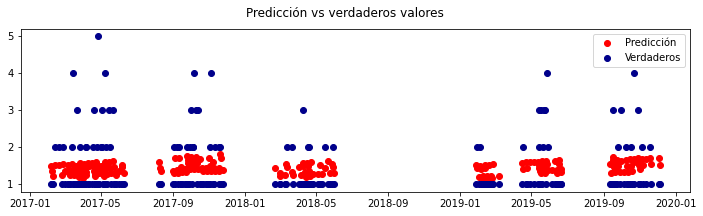

In [30]:
prediccion_de_cuenta = Predicciones_Poisson_summary_frame['mean']
verdadera_cuenta = y_train['Numero_de_asistencias']
fig, ax = plt.subplots(figsize = (12,3))
fig.suptitle('Predicción vs verdaderos valores')
ax.scatter(X_train.index, prediccion_de_cuenta, color = 'red', label='Predicción')
ax.scatter(X_train.index, verdadera_cuenta, color = 'darkblue', label='Verdaderos')
plt.legend()
plt.show()

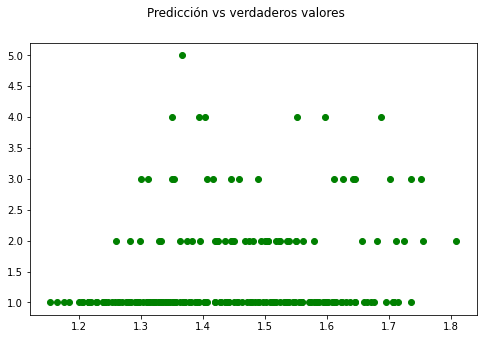

In [31]:
fig, ax = plt.subplots(figsize = (8,5))
fig.suptitle('Predicción vs verdaderos valores')
ax.scatter(prediccion_de_cuenta, verdadera_cuenta, color = 'green')
plt.show()

# 3. Regresión logística:

In [32]:
Dependiente = dataset_modelo[["Número de asistencias"]]

In [33]:
Explicativas.head()

,Día de la semana_jueves,Día de la semana_martes,Día de la semana_miércoles,Día de la semana_sábado,Día de la semana_viernes,Semana del semestre_10,Semana del semestre_11,Semana del semestre_12,Semana del semestre_13,Semana del semestre_14,Semana del semestre_15,Semana del semestre_16,Semana del semestre_17,Semana del semestre_18,Semana del semestre_19,Semana del semestre_3,Semana del semestre_4,Semana del semestre_5,Semana del semestre_6,Semana del semestre_7,Semana del semestre_8,Semana del semestre_9
Fecha,,,,,,,,,,,,,,,,,,,,,,
2017-02-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-02-08,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-02-10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-02-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2017-02-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [34]:
Dependiente["Categoría"] = 1
Dependiente["Categoría"] = Dependiente["Categoría"].where(Dependiente["Número de asistencias"]>2, 0)
Dependiente[Dependiente['Categoría']==1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Número de asistencias,Categoría
Fecha,,
2017-03-15,4,1
2017-03-22,3,1
2017-04-20,3,1
2017-04-27,5,1
2017-05-04,3,1
2017-05-08,4,1
2017-05-15,3,1
2017-05-22,3,1
2017-10-02,3,1


In [35]:
Var_Dependiente = Dependiente["Categoría"]

In [36]:
!pip install imblearn

In [37]:
# Balanceo de clases:

In [38]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [39]:
os = SMOTE(random_state=0)

In [40]:
X_os, Y_os = os.fit_sample(Explicativas, Var_Dependiente)
Explicativas
#Var_Dependiente

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,Día de la semana_jueves,Día de la semana_martes,Día de la semana_miércoles,Día de la semana_sábado,Día de la semana_viernes,Semana del semestre_10,Semana del semestre_11,Semana del semestre_12,Semana del semestre_13,Semana del semestre_14,Semana del semestre_15,Semana del semestre_16,Semana del semestre_17,Semana del semestre_18,Semana del semestre_19,Semana del semestre_3,Semana del semestre_4,Semana del semestre_5,Semana del semestre_6,Semana del semestre_7,Semana del semestre_8,Semana del semestre_9
Fecha,,,,,,,,,,,,,,,,,,,,,,
2017-02-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-02-08,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-02-10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-02-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2017-02-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-12,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-11-19,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-11-21,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
X_os=pd.DataFrame(X_os,columns=Explicativas.columns)

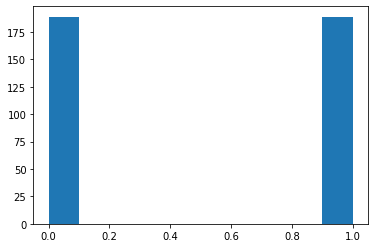

In [42]:
# clases balanceadas:
fig, ax = plt.subplots()
ax.hist(Y_os)
plt.show()

In [43]:
ModeloLogit = sm.Logit(Y_os, sm.add_constant(X_os))
ResultadosLogit = ModeloLogit.fit()
print(ResultadosLogit.summary())

         Current function value: 0.219237
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  378
Model:                          Logit   Df Residuals:                      355
Method:                           MLE   Df Model:                           22
Date:                Wed, 08 Jul 2020   Pseudo R-squ.:                  0.6837
Time:                        21:59:30   Log-Likelihood:                -82.872
converged:                      False   LL-Null:                       -262.01
Covariance Type:            nonrobust   LLR p-value:                 1.579e-62
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -60.6561   7.66e+06  -7.92e-06      1.000    -1.5e+07     1.5e+07
Día de la semana_

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [44]:
Predicciones = ResultadosLogit.predict(sm.add_constant(Explicativas))

In [45]:
Predicciones = pd.DataFrame({"Predicción puntual":Predicciones})

In [46]:
Predicciones["Categoría"] = 0

In [47]:
for i in range(len(Predicciones)):
    if Predicciones["Predicción puntual"][i] > 0.5:
        Predicciones["Categoría"][i] = 1
    else: 
        Predicciones["Categoría"][i] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
matriz_confusion = confusion_matrix(Var_Dependiente, Predicciones["Categoría"])

In [50]:
Originales_Prediccion = pd.concat([Predicciones, pd.DataFrame({"Categoría original": Var_Dependiente})], axis = 1)

In [51]:
Originales_Prediccion["Estado"] = "Ninguno"
for i in range(Originales_Prediccion.shape[0]):
    if Originales_Prediccion.iloc[i, 1] == Originales_Prediccion.iloc[i,2]:
        Originales_Prediccion.iloc[i, 3] = True
    else:
        Originales_Prediccion.iloc[i, 3] = False

In [52]:
print("Predicciones correctas: ", Originales_Prediccion["Estado"].sum())
print("Accuracy: ", round((((Originales_Prediccion["Estado"].sum())/Originales_Prediccion.shape[0])*100),2), "%")
print("Verdaderos positivos: ", matriz_confusion[1][1])
print("Verdaderos negativos: ", matriz_confusion[0][0])
print("Falsos positivos: ", matriz_confusion[0][1])
print("Falsos negativos: ", matriz_confusion[1][0])

Predicciones correctas:  190
Accuracy:  89.62 %
Verdaderos positivos:  4
Verdaderos negativos:  186
Falsos positivos:  3
Falsos negativos:  19


In [53]:
import seaborn as sns

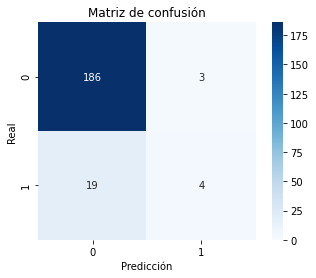

In [54]:
fig, ax = plt.subplots()
sns.heatmap(matriz_confusion, annot = True, square = True, 
            cmap = "Blues", vmin = 0, fmt = "g")
ax.set(xlabel = "Predicción", ylabel = "Real", 
       title = "Matriz de confusión")
plt.show()

In [55]:
from sklearn.metrics import classification_report

In [56]:
X_os

,Día de la semana_jueves,Día de la semana_martes,Día de la semana_miércoles,Día de la semana_sábado,Día de la semana_viernes,Semana del semestre_10,Semana del semestre_11,Semana del semestre_12,Semana del semestre_13,Semana del semestre_14,Semana del semestre_15,Semana del semestre_16,Semana del semestre_17,Semana del semestre_18,Semana del semestre_19,Semana del semestre_3,Semana del semestre_4,Semana del semestre_5,Semana del semestre_6,Semana del semestre_7,Semana del semestre_8,Semana del semestre_9
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26
374,1,0,0,0,0,0,0,0,0,235,0,0,0,0,0,0,0,0,0,0,0,0
375,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,0
376,0,0,0,0,0,0,0,0,0,0,107,0,0,0,0,0,0,0,0,0,0,0


In [57]:
print(classification_report(Var_Dependiente, Predicciones["Categoría"]))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       189
           1       0.57      0.17      0.27        23

    accuracy                           0.90       212
   macro avg       0.74      0.58      0.61       212
weighted avg       0.87      0.90      0.87       212



**Recall**:
\begin{equation}
\frac{TP}{TP+FN}
\end{equation}

**Precision**:
\begin{equation}
\frac{TN}{TN+FP}
\end{equation}

In [58]:
#Resultados.predict([2,4,2])

# Uso del modelo

In [59]:
def prediccion(dia, semana, semestre):
    dia_de_referencia = "Día de la semana_"+ str(dia)
    semana_de_referencia = "Semana del semestre_" + str(semana)
    
    dias = ['Día de la semana_jueves', 'Día de la semana_martes',
            'Día de la semana_miércoles', 'Día de la semana_sábado',
            'Día de la semana_viernes']
    
    semanas = ['Semana del semestre_10', 'Semana del semestre_11',
               'Semana del semestre_12', 'Semana del semestre_13',
               'Semana del semestre_14', 'Semana del semestre_15',
               'Semana del semestre_16', 'Semana del semestre_17',
               'Semana del semestre_18', 'Semana del semestre_19',
               'Semana del semestre_3', 'Semana del semestre_4',
               'Semana del semestre_5', 'Semana del semestre_6',
               'Semana del semestre_7', 'Semana del semestre_8',
               'Semana del semestre_9']
    
    X = pd.DataFrame({'Día de la semana_jueves': [0], 'Día de la semana_martes': [0],
                      'Día de la semana_miércoles': [0], 'Día de la semana_sábado': [0],
                      'Día de la semana_viernes': [0], 'Semana del semestre_10': [0],
                      'Semana del semestre_11': [0], 'Semana del semestre_12': [0],
                      'Semana del semestre_13': [0], 'Semana del semestre_14': [0],
                      'Semana del semestre_15': [0], 'Semana del semestre_16': [0],
                      'Semana del semestre_17': [0], 'Semana del semestre_18': [0],
                      'Semana del semestre_19': [0], 'Semana del semestre_3': [0],
                      'Semana del semestre_4': [0], 'Semana del semestre_5': [0],
                      'Semana del semestre_6': [0], 'Semana del semestre_7': [0],
                      'Semana del semestre_8': [0], 'Semana del semestre_9': [0]})
    Z = pd.DataFrame({'Día de la semana_jueves': [0], 'Día de la semana_martes': [0],
                      'Día de la semana_miércoles': [0], 'Día de la semana_sábado': [0],
                      'Día de la semana_viernes': [0], 'Semana del semestre_10': [0],
                      'Semana del semestre_11': [0], 'Semana del semestre_12': [0],
                      'Semana del semestre_13': [0], 'Semana del semestre_14': [0],
                      'Semana del semestre_15': [0], 'Semana del semestre_16': [0],
                      'Semana del semestre_17': [0], 'Semana del semestre_18': [0],
                      'Semana del semestre_19': [0], 'Semana del semestre_3': [0],
                      'Semana del semestre_4': [0], 'Semana del semestre_5': [0],
                      'Semana del semestre_6': [0], 'Semana del semestre_7': [0],
                      'Semana del semestre_8': [0], 'Semana del semestre_9': [0]})
    
    Falso = pd.DataFrame({'Día de la semana_jueves': [1], 'Día de la semana_martes': [0],
                          'Día de la semana_miércoles': [0], 'Día de la semana_sábado': [0],
                          'Día de la semana_viernes': [0], 'Semana del semestre_10': [0],
                          'Semana del semestre_11': [0], 'Semana del semestre_12': [0],
                          'Semana del semestre_13': [0], 'Semana del semestre_14': [0],
                          'Semana del semestre_15': [0], 'Semana del semestre_16': [0],
                          'Semana del semestre_17': [0], 'Semana del semestre_18': [0],
                          'Semana del semestre_19': [0], 'Semana del semestre_3': [0],
                          'Semana del semestre_4': [0], 'Semana del semestre_5': [0],
                          'Semana del semestre_6': [0], 'Semana del semestre_7': [0],
                          'Semana del semestre_8': [0], 'Semana del semestre_9': [0]})
    resultado = "Nada"
    
    if dia_de_referencia in dias:
        X[dia_de_referencia] = 1
    else:
        resultado = "Día incorrecto"
    
    if semana_de_referencia in semanas:
        X[semana_de_referencia] = 1
    else:
        resultado = "Semana incorrecta"
    
    if resultado in ["Día incorrecto", "Semana incorrecta"]:
        resultado_final = resultado
    else:
        X = pd.concat([X, Falso])
        prediccion = ResultadosLogit.predict(sm.add_constant(X))
        prediccion = prediccion.reset_index(drop = True)
        prediccion = prediccion[0]
        if prediccion > 0.5:
            resultado_final = "Para este día se estiman más de dos asistencias"
        else:
            resultado_final = "Para este día se estiman dos o menos asistencias"
    return(resultado_final)

In [63]:
# PRONÓSTICO

dia = input("Ingrese el día de la semana para el que desea realizar la predicción:")
semana = input("Ingrese el número de la semana para el que desea realizar la predicción:")
semestre=0
prediccion(dia, semana,semestre)

#Nota: el día debe entrar en minúscula con la tilde respectiva.
#La semana debe ser superior a 2 y menor que 19

Ingrese el día de la semana para el que desea realizar la predicción:martes
Ingrese el número de la semana para el que desea realizar la predicción:11


'Para este día se estiman dos o menos asistencias'